In [53]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [54]:
data = pd.read_excel("states.xlsx")

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country,37.0,1.845946e+01,1.096356e+01,1.0,9.00,18.0,28.00,37.0
"GDP (€, millions)",36.0,4.586406e+05,7.453450e+05,3625.0,36371.00,171330.5,434098.00,3032820.0
Accession Year,28.0,1.988286e+03,1.942098e+01,1958.0,1973.00,1995.0,2004.00,2013.0
Council Votes,28.0,1.257143e+01,8.954323e+00,3.0,7.00,10.0,13.25,29.0
European Parliament Seats,28.0,2.682143e+01,2.493258e+01,6.0,11.00,19.0,27.50,96.0
"GDP per capita ($, millions)",36.0,3.008039e+04,2.348747e+04,3945.0,12507.25,21661.5,43800.25,101450.0
"GDP ($, millions)",36.0,5.046215e+05,8.250184e+05,3987.0,40168.25,190003.5,481705.50,3363447.0
Population Density,37.0,1.524865e+02,2.235462e+02,3.0,66.00,101.0,134.00,1359.0
Area (km²),37.0,1.582041e+05,1.862404e+05,160.0,41285.00,78866.0,243610.00,783356.0
Population,37.0,1.655862e+07,2.367714e+07,37366.0,2069172.00,7114393.0,11237274.00,81197537.0


In [56]:
data.head()

,Country,"GDP (€, millions)",Accession Year,Council Votes,European Parliament Seats,"GDP per capita ($, millions)","GDP ($, millions)",Population Density,Area (km²),Population
0,1,10267.0,NaN,NaN,NaN,3945.0,11398.0,101,28748,2892302
1,2,339896.0,1995.0,10.0,18.0,43775.0,376950.0,102,83855,8576261
2,3,410351.0,1958.0,12.0,21.0,40324.0,455086.0,368,30528,11237274
3,4,45287.0,2007.0,10.0,17.0,6994.0,50199.0,65,110994,7202198
4,5,43847.0,2013.0,7.0,11.0,11536.0,48732.0,75,56594,4225316


In [58]:
data = data.dropna()
data.index=data.iloc[:,0]              
data=data.iloc[:,1:8]

In [59]:
data

,"GDP (€, millions)",Accession Year,Council Votes,European Parliament Seats,"GDP per capita ($, millions)","GDP ($, millions)",Population Density
Country,,,,,,,
2,339896.0,1995.0,10.0,18.0,43775.0,376950.0,102
3,410351.0,1958.0,12.0,21.0,40324.0,455086.0,368
4,45287.0,2007.0,10.0,17.0,6994.0,50199.0,65
5,43847.0,2013.0,7.0,11.0,11536.0,48732.0,75
6,17637.0,2004.0,4.0,6.0,23243.0,19560.0,92
7,166964.0,2004.0,12.0,21.0,17548.0,185156.0,134
8,271786.0,1973.0,7.0,13.0,51989.0,295091.0,131
9,20252.0,2004.0,4.0,6.0,17119.0,22459.0,29
10,209511.0,1995.0,7.0,13.0,42311.0,231950.0,16


In [60]:
kmeans = KMeans(n_clusters = 5)        # k-means clustering
kmeans

KMeans(n_clusters=5)

In [61]:
k_fit = kmeans.fit(data)
k_fit.labels_
clusters = k_fit.labels_
pd.DataFrame({"Country" : data.index, "clusters": clusters})

,Country,clusters
0,2,0
1,3,0
2,4,2
3,5,2
4,6,2
5,7,2
6,8,2
7,9,2
8,10,2
9,11,1


In [62]:
!pip install yellowbrick                              

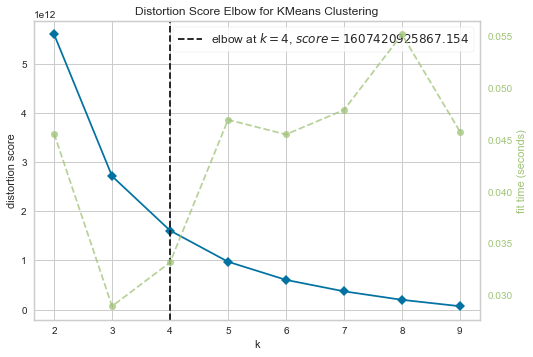

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer                                             
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(data) 
visualizer.poof()                       # Elbow method minimizes within-cluster Sum of Square

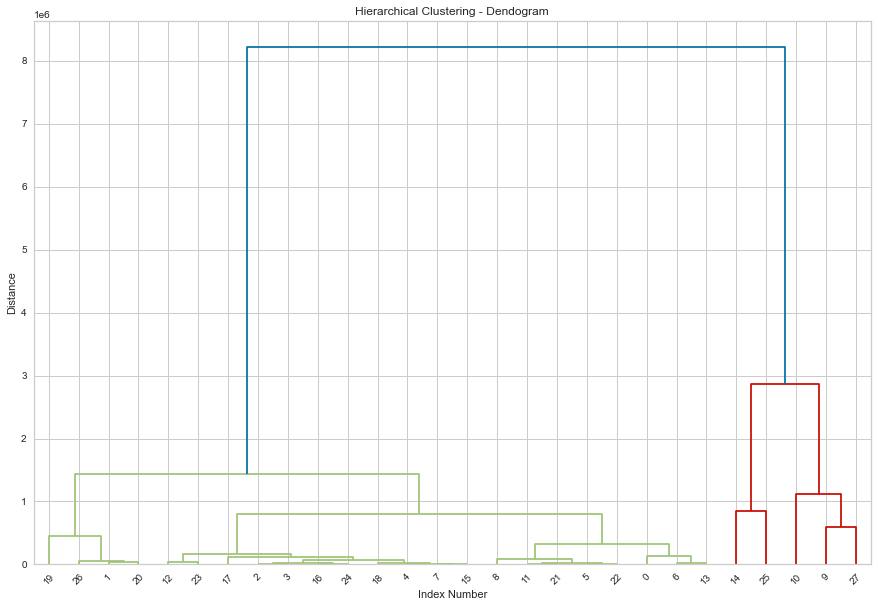

In [64]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")
hc_ward=linkage(data,"ward")

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_ward,                                                                              
leaf_font_size=10);
#I think 4 clusters are best number for this analysis.

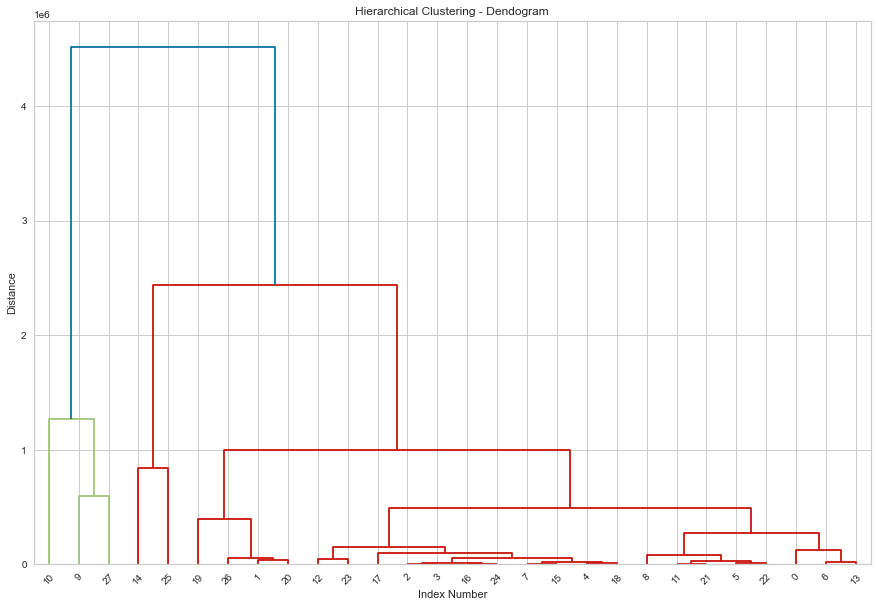

In [66]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_complete,                                                                              
leaf_font_size=10);

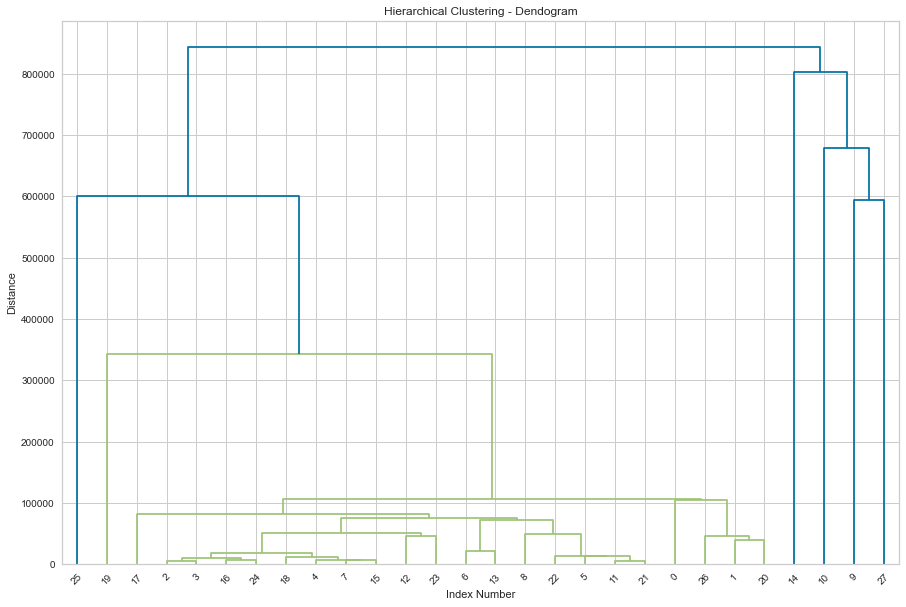

In [65]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_single,                                                                              
leaf_font_size=10);

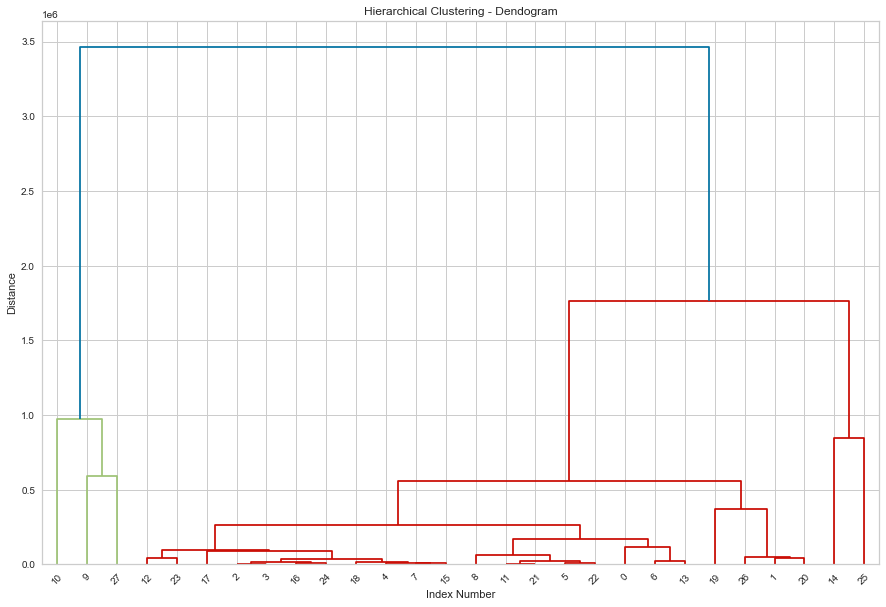

In [67]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_average,                                                                              
leaf_font_size=10);